<a href="https://colab.research.google.com/github/Clayton-J-Roy/clayton-roy-personal-repository/blob/Data-Center-Growth-Projections---Solar-Farm-Business-Analysis-Rec/Data_Center_Growth_Projections_for_Large_Scale_Solar_Array_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRODUCING LINEAR REGRESSION MODELS TO TRACK AND PREDICT DATA CENTER GROWTH**

  My goal is to produce visualizations to encourage a large solar installation company to investigate purchase agreements with Amazon. Amazon has an energy match initiative to supplement their overconsumption of available electricity from local power companies. By targeting their public mission, we can leverage the ability to produce solar farms to capture a major market segment in an otherwise volatile industry.

In [ ]:
# Remove redundancy
df = df.drop(0).reset_index(drop=True)

# Rename columns
df.rename(columns={
    'Number of data centre': 'Number of data centers',
    'Unnamed: 3': 'Both Metrics Available',
    'Unnamed: 4': 'N/A White Space Data',
    'Unnamed: 5': 'N/A Gross Power Data',
    'Unnamed: 6': 'Available White Space Data',
    'Unnamed: 7': 'Available Gross Power Data'
}, inplace=True)

# Drop rows where 'Country' is missing
df.dropna(subset=['Country'], inplace=True)

# Convert 'Number of data centers' to numeric, coercing errors
df['Number of data centers'] = pd.to_numeric(df['Number of data centers'], errors='coerce')

# Check for missing values after dropping rows
print("Missing values after cleaning:")
display(df.isnull().sum())

# Check data types after conversion
print("\nData types after conversion:")
display(df.dtypes)

Missing values after cleaning:


,0
Region,0
Country,0
Number of data centers,0
Both Metrics Available,0
N/A White Space Data,0
N/A Gross Power Data,0
Available White Space Data,0
Available Gross Power Data,0



Data types after conversion:


,0
Region,object
Country,object
Number of data centers,int64
Both Metrics Available,object
N/A White Space Data,object
N/A Gross Power Data,object
Available White Space Data,object
Available Gross Power Data,object


In [ ]:
import pandas as pd

df = pd.read_csv('/data-centres-worldwide.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Region,Country,Number of data centre,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,Total,both metrics available,n/a white space data,n/a gross power data,available white space data,available gross power data
1,Americas,Dominican Republic,1,0,1,1,0,0
2,Americas,Guatemala,1,0,1,1,0,0
3,Americas,Bolivia,2,0,2,2,0,0
4,Americas,Venezuela,2,0,1,2,1,0


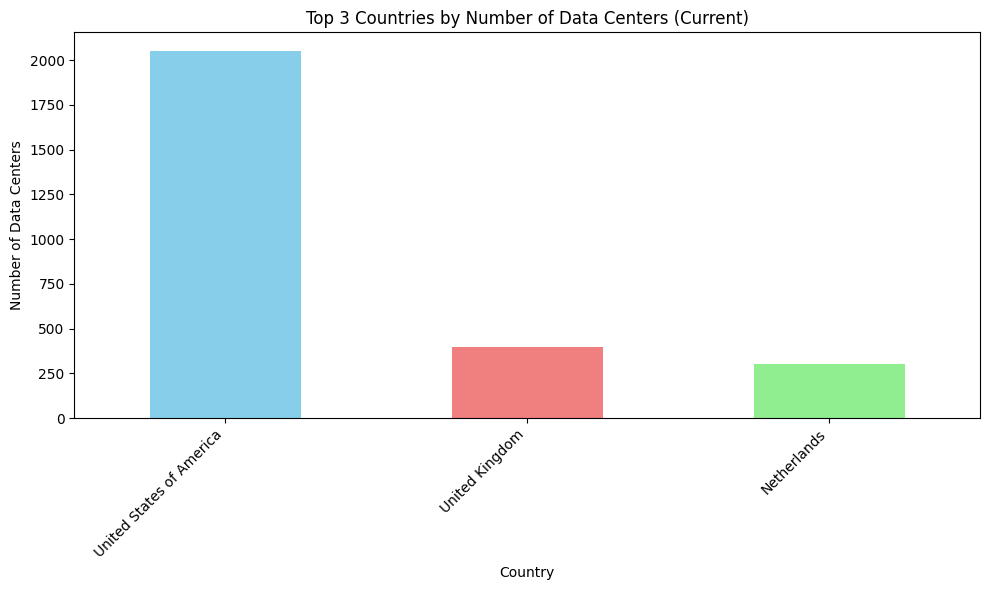

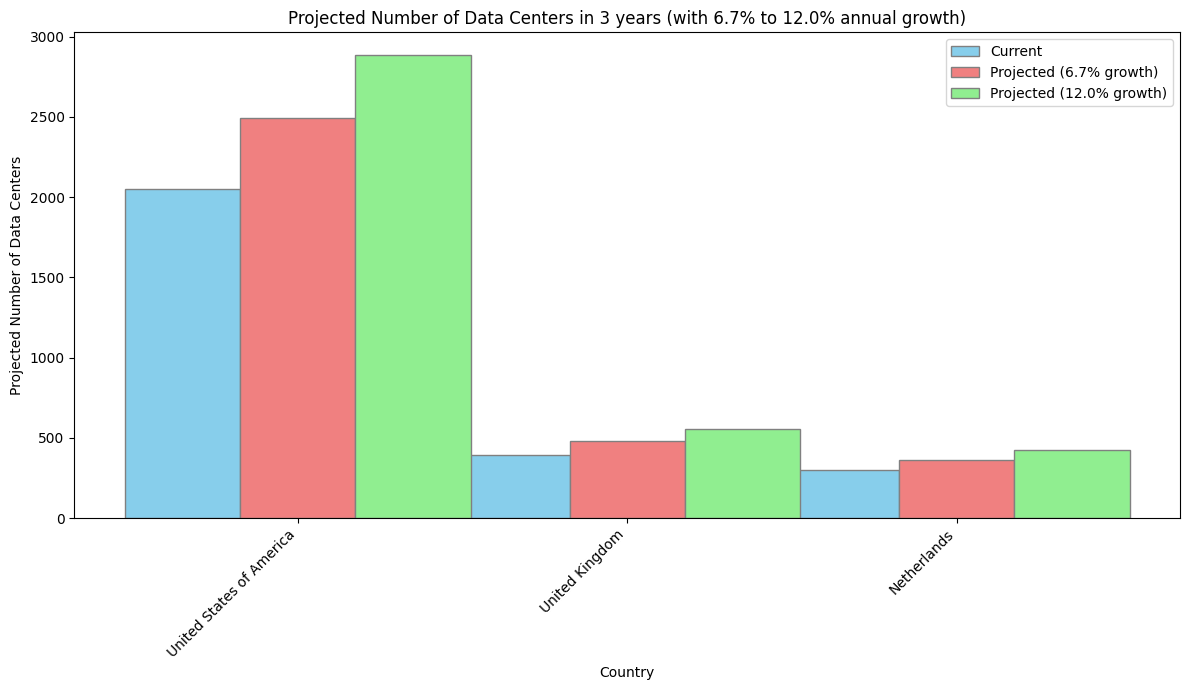

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize current top 3 countries
plt.figure(figsize=(10, 6))
top_3_countries.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Top 3 Countries by Number of Data Centers (Current)')
plt.xlabel('Country')
plt.ylabel('Number of Data Centers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize projected future growth for top 3 countries with the growth range
bar_width = 0.35
r1 = np.arange(len(top_3_countries))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 7))
plt.bar(r1, top_3_countries.values, color='skyblue', width=bar_width, edgecolor='grey', label='Current')
plt.bar(r2, future_data_centers_min.values, color='lightcoral', width=bar_width, edgecolor='grey', label=f'Projected ({min_annual_growth_rate*100}% growth)')
plt.bar(r3, future_data_centers_max.values, color='lightgreen', width=bar_width, edgecolor='grey', label=f'Projected ({max_annual_growth_rate*100}% growth)')

plt.title(f'Projected Number of Data Centers in {projection_years} years (with {min_annual_growth_rate*100}% to {max_annual_growth_rate*100}% annual growth)')
plt.xlabel('Country')
plt.ylabel('Projected Number of Data Centers')
plt.xticks([r + bar_width for r in range(len(top_3_countries))], top_3_countries.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Define the new hypothetical annual growth rate range (from U.S. Department of Energy data)
min_annual_growth_rate = 0.067
max_annual_growth_rate = 0.120

# Define the number of years to project into the future
projection_years = 3

# Project future growth for the top 3 countries using the minimum growth rate
future_data_centers_min = top_3_countries * (1 + min_annual_growth_rate)**projection_years

# Project future growth for the top 3 countries using the maximum growth rate
future_data_centers_max = top_3_countries * (1 + max_annual_growth_rate)**projection_years


print(f"Projected number of data centers in {projection_years} years (with {min_annual_growth_rate*100}% minimum annual growth):")
display(future_data_centers_min.round(2))

print(f"\nProjected number of data centers in {projection_years} years (with {max_annual_growth_rate*100}% maximum annual growth):")
display(future_data_centers_max.round(2))

Projected number of data centers in 3 years (with 6.7% minimum annual growth):


,Number of data centers
Country,
United States of America,2492.70
United Kingdom,479.83
Netherlands,364.43



Projected number of data centers in 3 years (with 12.0% maximum annual growth):


,Number of data centers
Country,
United States of America,2882.91
United Kingdom,554.95
Netherlands,421.48


In [ ]:
# Group by country and sum the number of data centers
country_data_centers = df.groupby('Country')['Number of data centers'].sum()

# Sort in descending order and get the top 3
top_3_countries = country_data_centers.sort_values(ascending=False).head(3)

print("Top 3 countries with the highest number of data centers:")
display(top_3_countries)

Top 3 countries with the highest number of data centers:


,Number of data centers
Country,
United States of America,2052
United Kingdom,395
Netherlands,300


In [ ]:
df_usa = df[df['Country'] == 'United States of America']
display(df_usa)

,Region,Country,Number of data centers,Both Metrics Available,N/A White Space Data,N/A Gross Power Data,Available White Space Data,Available Gross Power Data
15,Americas,United States of America,2052,386,1241,1645,811,407


In [ ]:
# Calculate the standard deviation of the annual growth rate range
# Assume the range represents approximately +/- 2 standard deviations from the mean
growth_rate_range = max_annual_growth_rate - min_annual_growth_rate
std_dev_growth_rate = growth_rate_range / 4  # Assuming range covers mean +/- 2 std dev

# Define the number of years to project into the future
projection_years = 3

# Extract the current number of data centers for the United States of America
current_data_centers_usa = df_usa['Number of data centers'].iloc[0]

# Create an array of years for the projection
years = np.arange(projection_years + 1)

In [ ]:
# Calculate the average annual growth rate
average_annual_growth_rate = (min_annual_growth_rate + max_annual_growth_rate) / 2

# Project the average future number of data centers for each year
projected_average_data_centers_usa = current_data_centers_usa * (1 + average_annual_growth_rate)**years

# Project the standard deviation of the future number of data centers for each year
# Using a simplified approach assuming standard deviation scales linearly with the mean projection
projected_std_dev_data_centers_usa = projected_average_data_centers_usa * std_dev_growth_rate * np.sqrt(years + 1)

print("Projected average number of data centers for USA:")
display(projected_average_data_centers_usa.round(2))

print("\nProjected standard deviation of data centers for USA:")
display(projected_std_dev_data_centers_usa.round(2))

Projected average number of data centers for USA:


array([2052.  , 2243.86, 2453.66, 2683.08])


Projected standard deviation of data centers for USA:


array([27.19, 42.05, 56.31, 71.1 ])

Data loaded successfully.

Data for United States of America:


,Region,Country,Number of data centers,Both Metrics Available,N/A White Space Data,N/A Gross Power Data,Available White Space Data,Available Gross Power Data
16,Americas,United States of America,2052,386,1241,1645,811,407



Projected average number of data centers for USA:


array([2052.  , 2243.86, 2453.66, 2683.08])


Projected standard deviation of data centers for USA:


array([27.19, 42.05, 56.31, 71.1 ])

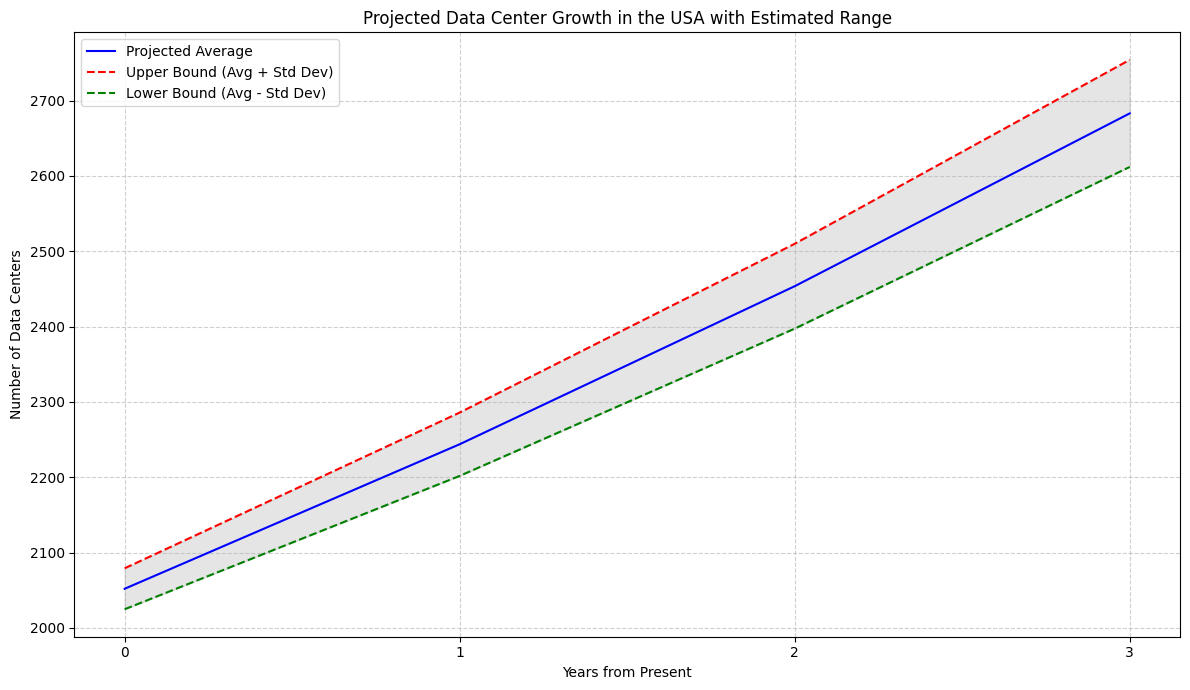

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path
file_path = '/data-centres-worldwide.csv'

# --- Data Loading ---
# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # Handle the error appropriately, perhaps exit or raise
    exit() # Or raise FileNotFoundError

# --- Data Cleaning ---
# Drop the first row which contains redundant header information
df = df.drop(0).reset_index(drop=True)

# Rename columns for clarity
df.rename(columns={
    'Number of data centre': 'Number of data centers',
    'Unnamed: 3': 'Both Metrics Available',
    'Unnamed: 4': 'N/A White Space Data',
    'Unnamed: 5': 'N/A Gross Power Data',
    'Unnamed: 6': 'Available White Space Data',
    'Unnamed: 7': 'Available Gross Power Data'
}, inplace=True)

# Drop rows where 'Country' is missing
df.dropna(subset=['Country'], inplace=True)

# Convert 'Number of data centers' to numeric, coercing errors
df['Number of data centers'] = pd.to_numeric(df['Number of data centers'], errors='coerce')

# --- Filter data for the United States of America ---
# Extract the data for the United States of America from the cleaned DataFrame
df_usa = df[df['Country'] == 'United States of America'].copy() # Use .copy() to avoid SettingWithCopyWarning

print("\nData for United States of America:")
display(df_usa)

# --- Project future growth with standard deviation for USA ---
# Define the hypothetical annual growth rate range (from U.S. Department of Energy data)
min_annual_growth_rate = 0.067
max_annual_growth_rate = 0.120

# Calculate the standard deviation of the annual growth rate range
# Assume the range represents approximately +/- 2 standard deviations from the mean
growth_rate_range = max_annual_growth_rate - min_annual_growth_rate
std_dev_growth_rate = growth_rate_range / 4  # Assuming range covers mean +/- 2 std dev

# Define the number of years to project into the future
projection_years = 3

# Extract the current number of data centers for the United States of America
# Use .iloc[0] or .item() to get the scalar value
current_data_centers_usa = df_usa['Number of data centers'].iloc[0]

# Create an array of years for the projection, starting from 0 for the current year
years = np.arange(projection_years + 1)

# Calculate the average annual growth rate
average_annual_growth_rate = (min_annual_growth_rate + max_annual_growth_rate) / 2

# Project the average future number of data centers for each year
projected_average_data_centers_usa = current_data_centers_usa * (1 + average_annual_growth_rate)**years

# Project the standard deviation of the future number of data centers for each year
# Using a simplified approach assuming standard deviation scales with the mean projection and sqrt(time)
# This is a simplification; a more rigorous approach would involve probabilistic modeling
projected_std_dev_data_centers_usa = projected_average_data_centers_usa * std_dev_growth_rate * np.sqrt(years + 1) # Adding 1 to years to avoid sqrt(0) at year 0

print("\nProjected average number of data centers for USA:")
display(projected_average_data_centers_usa.round(2))

print("\nProjected standard deviation of data centers for USA:")
display(projected_std_dev_data_centers_usa.round(2))

# --- Visualize projected growth with line chart for USA ---
plt.figure(figsize=(12, 7))

plt.plot(years, projected_average_data_centers_usa, label='Projected Average', color='blue')
# Plotting upper and lower bounds based on the simplified standard deviation
plt.plot(years, projected_average_data_centers_usa + projected_std_dev_data_centers_usa, '--', label='Upper Bound (Avg + Std Dev)', color='red')
# Ensure lower bound does not go below zero
lower_bound = projected_average_data_centers_usa - projected_std_dev_data_centers_usa
lower_bound[lower_bound < 0] = 0 # Ensure projected number of data centers is non-negative
plt.plot(years, lower_bound, '--', label='Lower Bound (Avg - Std Dev)', color='green')


# Fill the area between the upper and lower bounds
plt.fill_between(years, lower_bound, projected_average_data_centers_usa + projected_std_dev_data_centers_usa, color='gray', alpha=0.2)

plt.title('Projected Data Center Growth in the USA with Estimated Range')
plt.xlabel('Years from Present')
plt.ylabel('Number of Data Centers')
plt.xticks(years) # Set x-ticks to be the years
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 3 countries with the highest number of data centers are the United States of America (2052), the United Kingdom (395), and the Netherlands (300).
*   Projecting future growth for the top 3 countries over the next 3 years with a minimum 6.7% annual growth rate estimates the number of data centers to be approximately: USA (2492.70), UK (479.83), and Netherlands (364.43).
*   Projecting future growth for the top 3 countries over the next 3 years with a maximum 12.0% annual growth rate estimates the number of data centers to be approximately: USA (2882.91), UK (554.95), and Netherlands (421.48).
*   A line chart was generated to visualize the projected exponential growth of data centers in the United States of America over the next 3 years, including an estimated range based on the growth rate variability.


